In [36]:
import scorecardpy as sc

# data prepare ------
# load germancredit data
dat = sc.germancredit()
dat.head()

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,...,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,...,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,...,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,...,2,none,yes,good
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,...,2,none,yes,good
4,... < 0 DM,24,delay in paying off in the past,car (new),...,2,none,yes,bad


In [87]:
dat.to_excel("germancredit.xlsx")

In [3]:
dat.groupby('creditability').count()

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,present.residence.since,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker
creditability,,,,,,,,,,,,,,,,,,,,
bad,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
good,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700


In [37]:
# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(dat, y="creditability", iv_limit=0.05)

[INFO] filtering variables ...


C:\Users\admin\Anaconda3\lib\site-packages\scorecardpy\condition_fun.py:113: UserWarning: The positive value in "creditability" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


In [122]:
dt_s.head()
dt_x=dt_s.drop(["creditability"], axis=1)
dt_x.head()
dt_y=dt_s.creditability

In [39]:
# breaking dt into train and test
train, test = sc.split_df(dt_s, 'creditability').values()

In [40]:
# woe binning ------
bins = sc.woebin(dt_s, y="creditability")

[INFO] creating woe binning ...


In [47]:
import pandas as pd

bins_df=pd.DataFrame.from_dict({(i,j): bins[i][j] for i in bins.keys() for j in bins[i].keys()}, orient='columns')
bins_df.to_excel('germancreditIV.xlsx')

In [60]:
bins["property"]

,variable,bin,count,count_distr,...,bin_iv,total_iv,breaks,is_special_values
0,property,real estate,282,0.282,...,0.054007,0.112638,real estate,False
1,property,building society savings agreement/ life insur...,232,0.232,...,0.000190,0.112638,building society savings agreement/ life insur...,False
2,property,"car or other, not in attribute Savings account...",332,0.332,...,0.000391,0.112638,"car or other, not in attribute Savings account...",False
3,property,unknown / no property,154,0.154,...,0.058050,0.112638,unknown / no property,False


{'savings.account.and.bonds': <Figure size 432x288 with 2 Axes>,
 'age.in.years': <Figure size 432x288 with 2 Axes>,
 'duration.in.month': <Figure size 432x288 with 2 Axes>,
 'status.of.existing.checking.account': <Figure size 432x288 with 2 Axes>,
 'housing': <Figure size 432x288 with 2 Axes>,
 'present.employment.since': <Figure size 432x288 with 2 Axes>,
 'property': <Figure size 432x288 with 2 Axes>,
 'credit.history': <Figure size 432x288 with 2 Axes>,
 'credit.amount': <Figure size 432x288 with 2 Axes>,
 'other.installment.plans': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>}

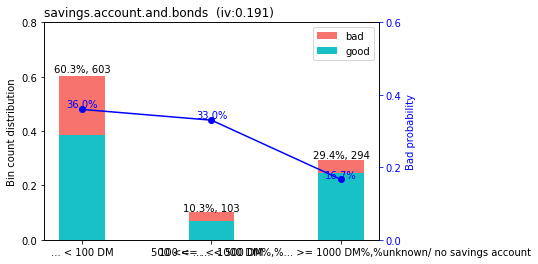

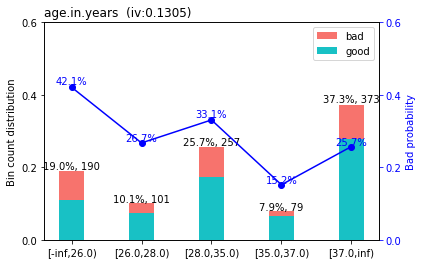

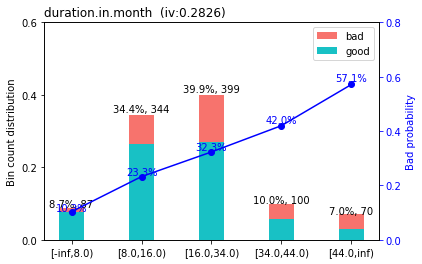

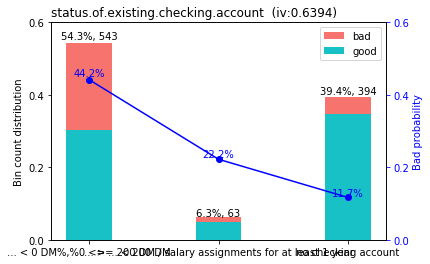

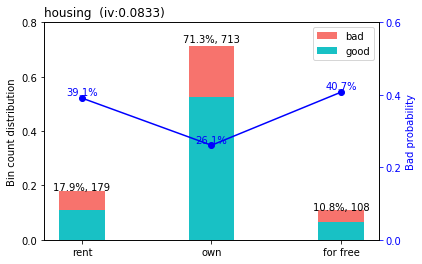

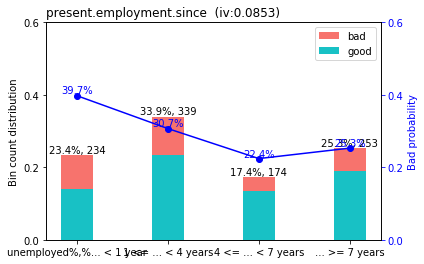

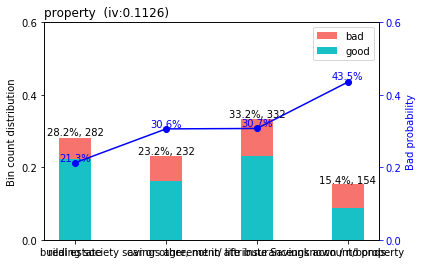

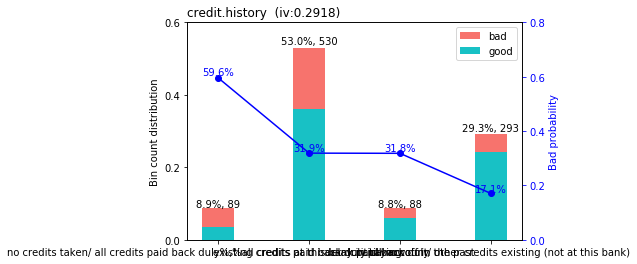

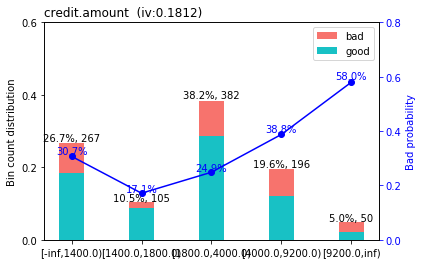

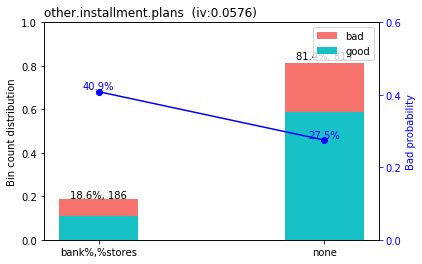

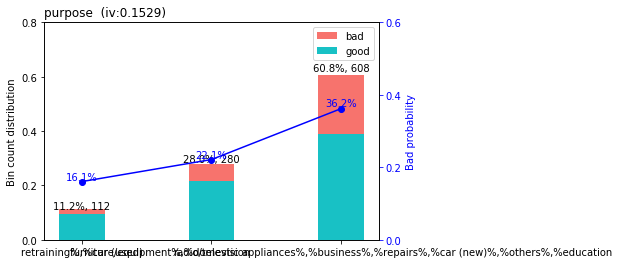

In [42]:
sc.woebin_plot(bins)

In [61]:
# binning adjustment
# # adjust breaks interactively
# breaks_adj = sc.woebin_adj(dt_s, "creditability", bins) 
# # or specify breaks manually
breaks_adj = {
    'age.in.years': [26, 35, 40],
    'other.debtors.or.guarantors': ["none", "co-applicant%,%guarantor"],
    'housing': ["own","rent%,%for free"],
    'credit.history':["no credits taken/ all credits paid back duly%,%all credits at this bank paid back duly",
                      "existing credits paid back duly till now%,%delay in paying off in the past",
                      "critical account/ other credits existing (not at this bank)"],
    'property': ["real estate","building society savings agreement/ life insurance%,%car or other, not in attribute Savings account/bonds",
                 "unknown / no property"]
}
bins_adj = sc.woebin(dt_s, y="creditability", breaks_list=breaks_adj) 

[INFO] creating woe binning ...


{'savings.account.and.bonds': <Figure size 432x288 with 2 Axes>,
 'age.in.years': <Figure size 432x288 with 2 Axes>,
 'duration.in.month': <Figure size 432x288 with 2 Axes>,
 'status.of.existing.checking.account': <Figure size 432x288 with 2 Axes>,
 'housing': <Figure size 432x288 with 2 Axes>,
 'present.employment.since': <Figure size 432x288 with 2 Axes>,
 'property': <Figure size 432x288 with 2 Axes>,
 'credit.history': <Figure size 432x288 with 2 Axes>,
 'credit.amount': <Figure size 432x288 with 2 Axes>,
 'other.installment.plans': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>}

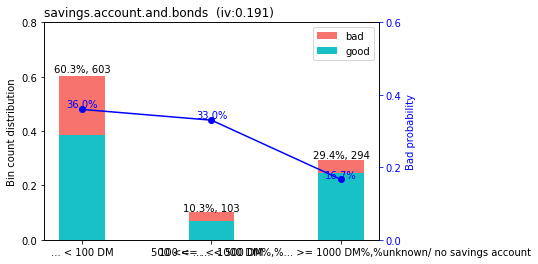

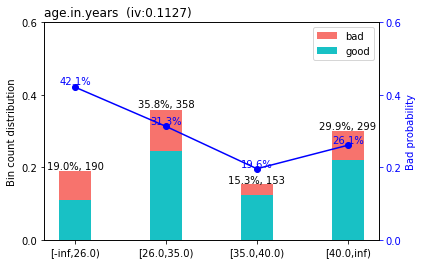

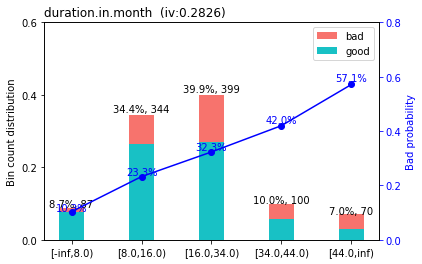

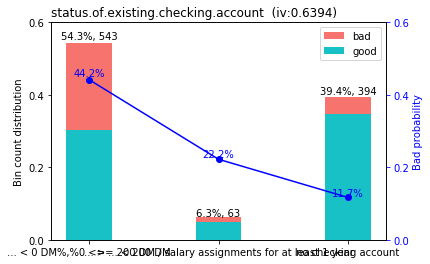

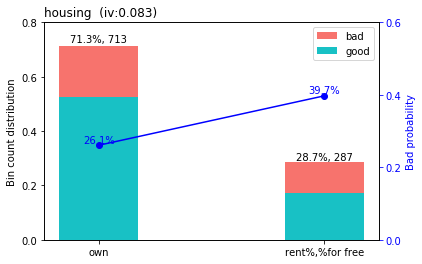

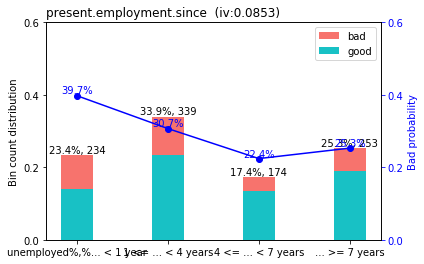

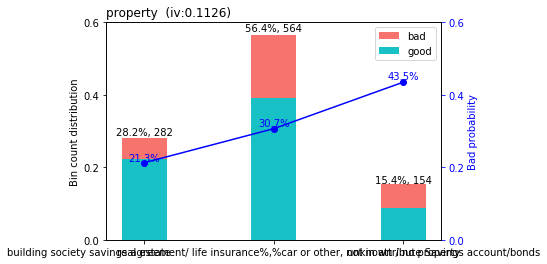

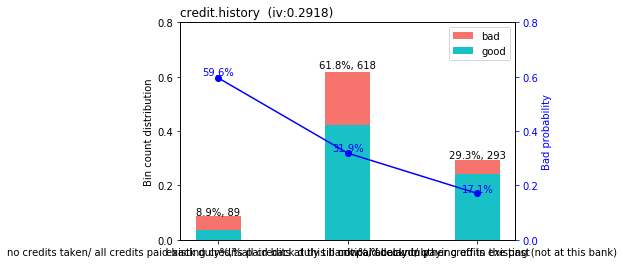

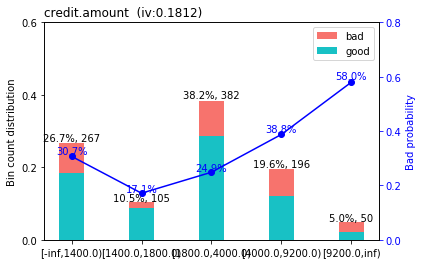

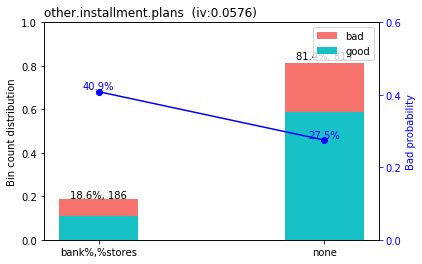

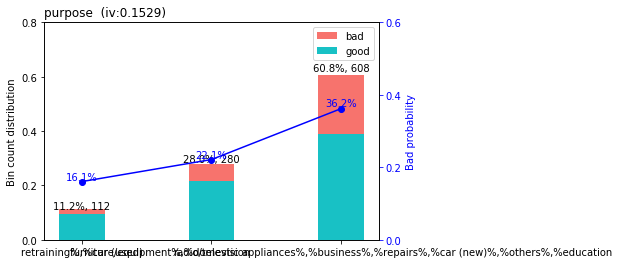

In [62]:
sc.woebin_plot(bins_adj)

In [63]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [64]:
y_train = train_woe.loc[:,'creditability']
X_train = train_woe.loc[:,train_woe.columns != 'creditability']
y_test = test_woe.loc[:,'creditability']
X_test = test_woe.loc[:,test_woe.columns != 'creditability']

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X=add_constant(X_train)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index= X.columns)

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                                      1.056277
savings.account.and.bonds_woe              1.065945
age.in.years_woe                           1.099337
duration.in.month_woe                      1.211580
status.of.existing.checking.account_woe    1.142089
housing_woe                                1.212592
present.employment.since_woe               1.094448
property_woe                               1.280346
credit.history_woe                         1.115182
credit.amount_woe                          1.158651
other.installment.plans_woe                1.066643
purpose_woe                                1.032268
dtype: float64

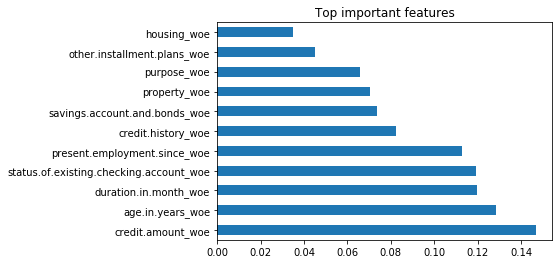

In [103]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=10)
clf.fit(X_train, y_train)

feat_importances=pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Top important features')
plt.show()

In [65]:
# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

C:\Users\admin\Anaconda3\lib\site-packages\scorecardpy\perf.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ], ignore_index=True)


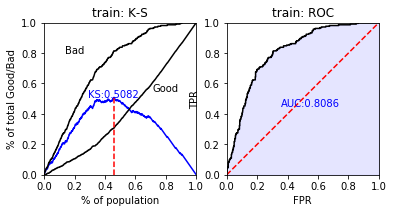

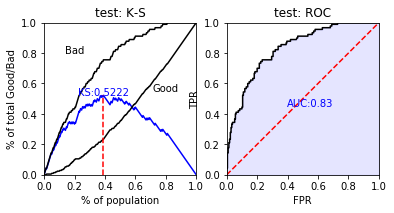

In [67]:
# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [104]:
#cross validation
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, X_train, y_train, cv=5))

[0.72142857 0.74285714 0.75       0.72142857 0.75714286]


In [115]:
# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns, pdo=40)
#save card as a pickle
import pickle
pickle_out=open("german_card.pickle","wb")
pickle.dump(card, pickle_out)
pickle_out.close()





In [112]:
#read in card from a pickle file
pickle_in=open("german_card.pickle","rb")
card_in=pickle.load(pickle_in)


# credit score
train_score = sc.scorecard_ply(train, card_in, print_step=0)
test_score = sc.scorecard_ply(test, card_in, print_step=0)


In [107]:

import pandas as pd
card_df=pd.DataFrame.from_dict({(i,j): card[i][j] for i in card.keys() for j in card[i].keys()}, orient='columns')
card_df.to_excel('german_card.xlsx')S

In [109]:
print(card['age.in.years'])

       variable          bin  points
3  age.in.years  [-inf,26.0)   -23.0
4  age.in.years  [26.0,35.0)    -3.0
5  age.in.years  [35.0,40.0)    25.0
6  age.in.years   [40.0,inf)     8.0


In [113]:
train_score.describe()

,score
count,700.000000
mean,493.954286
std,74.505125
min,287.000000
25%,439.000000
50%,492.000000
75%,553.000000
max,672.000000


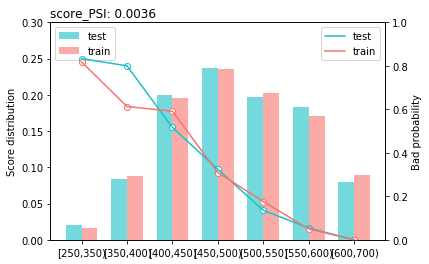

{'psi':   variable       PSI
 0    score  0.003619, 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [114]:
# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [117]:
from My_Model_Performance import ks
import pandas as pd

#merge only the test dataset
y_test_hat=test_pred

#convert ndarray to a dataframe, so that it can merge with true y in the merge statement

y_test_hat_df=pd.DataFrame(data=y_test_hat, columns=['Y_hats'], index=X_test.index.copy())

df_out=pd.merge(y_test, y_test_hat_df, how='left', left_index=True, right_index=True)
mydf=ks(data=df_out, target='creditability', prob='Y_hats')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.633479  0.927478      25          5     27.78%         2.38%   
2       0.507362  0.629471      14         16     15.56%         7.62%   
3       0.416201  0.502846      17         13     18.89%         6.19%   
4       0.332775  0.412908      12         18     13.33%         8.57%   
5       0.265910  0.324723       8         22      8.89%        10.48%   
6       0.185375  0.257322       6         24      6.67%        11.43%   
7       0.133635  0.179239       4         26      4.44%        12.38%   
8       0.084263  0.133040       3         27      3.33%        12.86%   
9       0.052961  0.083640       1         29      1.11%        13.81%   
10      0.016673  0.052648       0         30      0.00%        14.29%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             27.78

In [118]:
#try the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.71

In [119]:
#try the randomforest model
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier()
clf_rf=clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.73

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
clf_bgr=GradientBoostingRegressor()
clf_bgr=clf_bgr.fit(X_train, y_train)
clf_bgr.score(X_test, y_test)

0.2698388471696139